In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

# Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
- 1.fitting it to the periodic function
- 2.plot the fit
- Data
- Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
- Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [3]:
temp_max=np.array(Max)
temp_min=np.array(Min)
months=np.arange(12)

In [4]:
def yearly_temps(times,avg,ampl,time_offset):
    return (avg+ampl*np.cos((times+time_offset)*2*np.pi/times.max()))


res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])


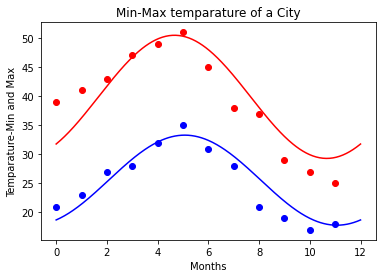

In [5]:

plt.plot(months,temp_max,'ro')
days = np.linspace(0, 12, num=365)
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months,temp_min,'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel("Months")
plt.ylabel("Temparature-Min and Max")
plt.title("Min-Max temparature of a City")
plt.show()

### Matplotlib:

In [6]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [7]:
titanic=pd.read_csv(url)

In [8]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
titanic.shape

(1310, 14)

In [10]:
titanic["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

### 1. Create a pie chart presenting the male/female proportion

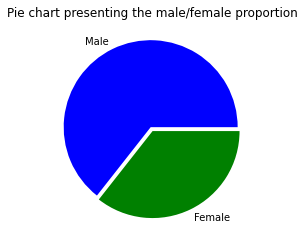

In [11]:
A=titanic["sex"].value_counts()

lable=["Male","Female"]
explode=[0.05,0]
plt.pie(A,labels=lable,colors=("Blue","Green"),explode=explode)
plt.title("Pie chart presenting the male/female proportion")
plt.show()

- Males are more than females

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [14]:
x=titanic["fare"].iloc[:1310]
y=titanic["age"].iloc[:1310]

titanic["sex"]=titanic["sex"].replace("male",0)
titanic["sex"]=titanic["sex"].replace('female',1)

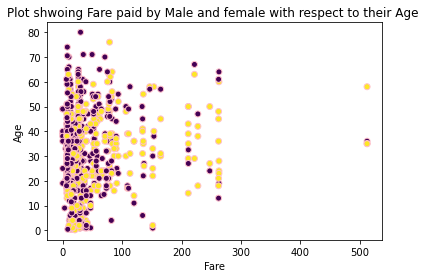

In [17]:
plt.scatter(x,y,c=titanic["sex"].iloc[:1310],cmap=plt.cm.viridis,edgecolors="Pink")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Plot shwoing Fare paid by Male and female with respect to their Age ")
plt.show()

- from the above chart we can understand that, majority of the fare paid between 0 to 100 rupee.
- major fare paid by age group from 10 to 50 years.
- male and female have paid fare charges almost equally.
- less members have paid fare charges fro 100-500 rupees.